In [1]:
import src.utils as utils
import matplotlib.pyplot as plt

In [2]:
# Count the number of instances in the dataset
raw_data = "../data/raw"
print("Total of yes instances: ", utils.data_processing.count_instances(raw_data+'/yes'))
print("Total of no instances: ", utils.data_processing.count_instances(raw_data+'/no'))

Total of yes instances:  155
Total of no instances:  98


In [3]:
from src.data.make_dataset import make_renamed_dataset
make_renamed_dataset(raw_data+'/yes', "../data/interim/yes", "Y_")

ValueError: The input target directory is already done.

In [4]:
import src.data as data
data.make_renamed_dataset(raw_data+'/no',"../data/interim/no", "N_")

ValueError: The input target directory is already done.

In [5]:
non_tumorous_files = utils.data_processing.count_instances("../data/interim/no")
yes_tumorous_files = utils.data_processing.count_instances("../data/interim/yes")
data = {"non_tumorous": non_tumorous_files, "yes_tumorous": yes_tumorous_files}

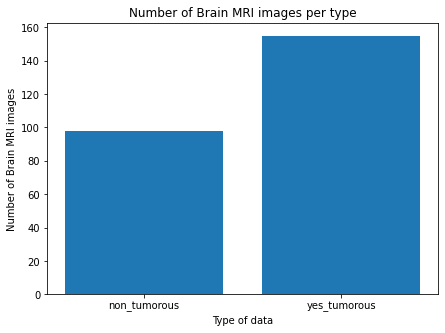

In [6]:
typex = [*data.keys()]
values = [*data.values()]

fig = plt.figure(figsize=(7, 5))
plt.bar(typex, values)
plt.xlabel("Type of data")
plt.ylabel("Number of Brain MRI images")
plt.title("Number of Brain MRI images per type")
plt.savefig("../data/external/number_images", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [2]:
#spliting the data into train(0.60), validation(0.20) and test(0.20)
import src.data as data
from types import SimpleNamespace

args = SimpleNamespace(input_filepath="../data/interim",
                       output_filepath="../data/interim/split",
                       train_ratio=0.6,
                       validation_ratio=0.2)
data.main(args.input_filepath, args.output_filepath, args.train_ratio, args.validation_ratio)


'The output directory already exists and is not empty. Please delete the directory and try again.'